![alt text](images/HDAT9500Banner.PNG)
<br>

# Chapter 6: Artificial Neural Networks / Deep Learning
# Exercise 01: 


# 1. Introduction

In this exercise, 


## 1.1. Aims of the Exercise:

1. This is an introduction to Artificial Neural Networks / Deep Learning. 
2. We will use Keras, a high-level API built on top of low level neural networks APIs such as Tensorflow and Theano. Keras takes care of many things and it is easy to use.

 
It aligns with all of the learning outcomes of our course: 

1.	Distinguish a range of task specific machine learning techniques appropriate for Health Data Science.
2.	Design machine learning tasks for Health Data Science scenarios.
3.	Construct appropriate training and test sets for health research data.


## 1.2. Jupyter Notebook Intructions
1. Read the content of each cell.
2. Where necessary, follow the instructions that are written in each cell.
3. Run/Execute all the cells that contain Python code sequentially (one at a time), using the "Run" button.
4. For those cells in which you are asked to write some code, please write the Python code first and then execute/run the cell.
 
## 1.3. Tips
 1. The square brackets on the left hand side of each cell indicate whether the cell has been executed or not. Empty square brackets mean that the cell has not been executed, whereas square brackets that contain a number means that the cell has been executed. Run all the cells in sequence, using the "Run" button.
 2. To edit this notebook, just double-click in each cell. In the document, each cell can be a "Code" cell or "text-Markdown" cell. To choose between these two options, go to the combo-box above. 
 3. If you want to save your notebook, please make sure you press the "floppy disk" icon button above. 
 4. To clean the content of all cells and re-start the Notebook, please go to Cell->All Output->Clear


# 2. Load the Wisconsin Cancer Data Set and Prepare the data

For data dictionary and all information:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [7]:
import sys
print(sys.version)
#For this notebook to work, Python must be 3.6.4 or 3.6.5

import numpy as np
import pandas as pd
from IPython.display import display

from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]


In [8]:
cancer = pd.read_csv('data/breast-cancer-wisconsin-data/data.csv', sep=',')

In [9]:
# Sanity Check:
display(cancer[:][:5])
print(cancer.shape)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 32)


In [10]:
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [12]:
# Divide the data into X and y (output, labels)
X = cancer.iloc[:, 2:].values
y_categorical = cancer.iloc[:, 1].values

In [13]:
# Sanity check
display(X[:][:5])

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02,
          1.00100000e+03,   1.18400000e-01,   2.77600000e-01,
          3.00100000e-01,   1.47100000e-01,   2.41900000e-01,
          7.87100000e-02,   1.09500000e+00,   9.05300000e-01,
          8.58900000e+00,   1.53400000e+02,   6.39900000e-03,
          4.90400000e-02,   5.37300000e-02,   1.58700000e-02,
          3.00300000e-02,   6.19300000e-03,   2.53800000e+01,
          1.73300000e+01,   1.84600000e+02,   2.01900000e+03,
          1.62200000e-01,   6.65600000e-01,   7.11900000e-01,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02,
          1.32600000e+03,   8.47400000e-02,   7.86400000e-02,
          8.69000000e-02,   7.01700000e-02,   1.81200000e-01,
          5.66700000e-02,   5.43500000e-01,   7.33900000e-01,
          3.39800000e+00,   7.40800000e+01,   5.22500000e-03,
          1.30800000e-02,   1.86000000e-02,   1.34000000e-02,
       

<div class="alert alert-block alert-success">**Start Activity**</div>

Pay attention to the shape of the input vector!!!!
We will use it later in our ANN.

In [14]:
 print(X.shape)

(569, 30)


### <font color='blue'> Question 1:  What is the meaning of (569,30) </font>

<b> Write answer here:</b>
#####################################################################################################################

(Double-click here)


#####################################################################################################################

<div class="alert alert-block alert-warning">**End Activity**</div>

In [15]:
# Sanity check:
# We can see that # 19, 20 and 21 are B within the array that goes from 0:29
display(y_categorical[:30])
print(y_categorical.shape)

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M'], dtype=object)

(569,)


Enconding categorical data into 0-1

In [16]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y_categorical)

In [17]:
# Sanity check
# We can see that # 19, 20 and 21 are "0" within the array that goes from 0:29
# Therefore, the sanity check confirms that we have done the encoding correctly
display(y[:30])
print(y.shape)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

(569,)


Splitting the dataset into the Training set and Test set

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

<font color=red>Scaling</font>  our data is <font color=red> very important </font> when we use ANNs:

In [21]:
# Very very very important: Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

So far, everything is very familiar. We have used some new scikit learn instructions, but esentially, we have been following these steps during the course.

The new part starts here:

# 3. Our first ANN using Keras


In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='blue'> Question 2: Initalise ANN: Check page 28 of the book we use in this chapter and write the command to initialise our first ANN </font>

In [39]:
# Write Python Code here:
ann1  = Sequential()

<div class="alert alert-block alert-warning">**End Activity**</div>

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='blue'> Question 3:  Add input layer and first hidden layer: Using the function add, create the input layer and fist hidden layer with 16 nodes, a relu activation function. Use the argument input_dim </font>
<p>
<font color='green'>Page 28 of our book</font>
<p>
<font color='green'>Read here how to use the function "add" by using the argument input_dim: 
<p>
    https://keras.io/getting-started/sequential-model-guide/</font>
<p>
<font color='green'> In addition, read:  
     https://keras.io/layers/merge/#add_1</font>
<p>
<font color='green'> Function "dense":           
    https://keras.io/layers/core/#dense

In [43]:
# Write Python Code here:
ann1.add(Dense(output_dim=16, input_dim=30))
ann1.add(Activation('relu'))

C:\Users\z3368601\AppData\Local\Anacondav3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=30, units=16)`
  


<div class="alert alert-block alert-warning">**End Activity**</div>

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='blue'> Question 4:  Add second hidden layer: Using the functions "add" and "dense", create a second layer with 16 nodes, a relu activation function.  </font>
<p>
<font color='green'>Page 28 of our book</font>
<p>
<font color='green'>Read here how to use the function "add" by using the argument input_dim: 
<p>
    https://keras.io/getting-started/sequential-model-guide/</font>
<p>
<font color='green'> In addition, read:  
     https://keras.io/layers/merge/#add_1</font>
<p>
<font color='green'> Function "dense":           
    https://keras.io/layers/core/#dense

In [44]:
# Write Python Code here:
ann1.add(Dense(output_dim=16, activation='relu'))


C:\Users\z3368601\AppData\Local\Anacondav3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16)`
  


<div class="alert alert-block alert-warning">**End Activity**</div>

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='blue'> Question 5:  Add output layer: Using the functions "add" and "dense". What activation function would you use and why?  </font>

In [45]:
# Write Python Code here:
ann1.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))


C:\Users\z3368601\AppData\Local\Anacondav3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


<div class="alert alert-block alert-warning">**End Activity**</div>

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='blue'> Question 6: Compile our model.  Use gradient descent ("adam", for example) for the optimizer, 
"binary_crossentropy" as the loss function, and accuracy as our metric.  </font>

In [47]:
# Write Python Code here:
# Compiling the ANN
ann1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

<div class="alert alert-block alert-warning">**End Activity**</div>

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='blue'> Question 7: # Fitting the ANN to the Training set. Set the batch_size=100, nb_epoch=150. These hyper-parameters have to be tuned. These numbers have been optimised already. </font>

In [48]:
# Write Python Code here:
ann1.fit(X_train, y_train, batch_size=100, nb_epoch=150)


C:\Users\z3368601\AppData\Local\Anacondav3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/150
512/512 [==============================] - 0s 943us/step - loss: 0.6928 - acc: 0.6328
Epoch 2/150
512/512 [==============================] - 0s 27us/step - loss: 0.6916 - acc: 0.6289
Epoch 3/150
512/512 [==============================] - 0s 23us/step - loss: 0.6900 - acc: 0.6289
Epoch 4/150
512/512 [==============================] - 0s 23us/step - loss: 0.6879 - acc: 0.6289
Epoch 5/150
512/512 [==============================] - 0s 21us/step - loss: 0.6847 - acc: 0.6289
Epoch 6/150
512/512 [==============================] - 0s 27us/step - loss: 0.6799 - acc: 0.6289
Epoch 7/150
512/512 [==============================] - 0s 20us/step - loss: 0.6718 - acc: 0.6289
Epoch 8/150
512/512 [==============================] - 0s 25us/step - loss: 0.6586 - acc: 0.6289
Epoch 9/150
512/512 [==============================] - 0s 20us/step - loss: 0.6376 - acc: 0.6328
Epoch 10/150
512/512 [==============================] - 0s 20us/step - loss: 0.6033 - acc: 0.7012
Epoch 11/150
512/512 [======

<div class="alert alert-block alert-warning">**End Activity**</div>

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='blue'> Question 8: Calculate accuracy, confusion matrix and all the metrics included in classification_report function  </font>

In [49]:
# Write Python Code here:
# Compiling the ANN
# Predicting the Test set results
y_pred = ann1.predict(X_test)
y_pred = (y_pred > 0.5)

In [50]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [51]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))


Our accuracy is 98.24561403508771%


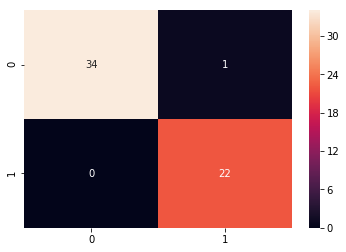

In [52]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

<div class="alert alert-block alert-warning">**End Activity**</div>